# Linear Regression - Practical Example

## Import Python Libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

from sklearn.linear_model import LinearRegression

## Import  Raw Data 

In [35]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [36]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing 

### Exploring the descriptive statistics of raw data

In [37]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dropping variable of no interest 

In [38]:
data = raw_data.drop(labels='Model', axis=1) # drop column 'Model'
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with missing values 

In [39]:
data.isna().sum() # check which column has missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [40]:
# missing values < 5% of all obersvations, we can delete them
data_no_mv = data.dropna(axis=0)

In [41]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDFs 

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


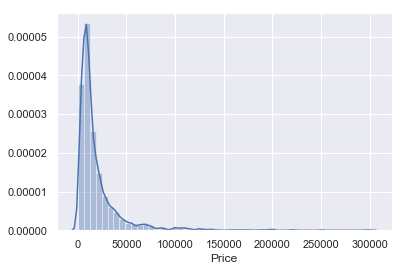

In [42]:
sns.distplot(data_no_mv['Price'])

Obviously there are outliers in the Price variable, which diminishes regression results. 
So We need to remove top 1% of observations, and same goes to other variables

### Dealing with outliers 

In [43]:
q1 = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q1]

In [44]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q2]

In [45]:
data_3 = data_2[data_2['EngineV']<6.5]

In [46]:
q4 = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [47]:
data_clean = data_4.reset_index(drop=True) # reset index from 0
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


## Check OLS assumptions

### Linearity 

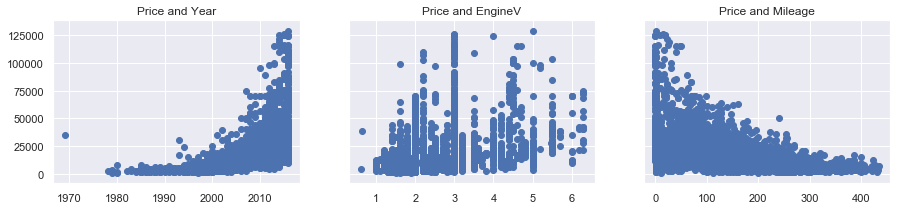

In [50]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_clean['Year'], data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['Price'])
ax3.set_title('Price and Mileage')
plt.show()

Given the expoential distribution of price, we can apply log transformation on price

In [53]:
log_price = np.log(data_clean['Price'])
data_clean['Log Price'] = log_price
data_clean = data_clean.drop(labels='Price', axis=1)

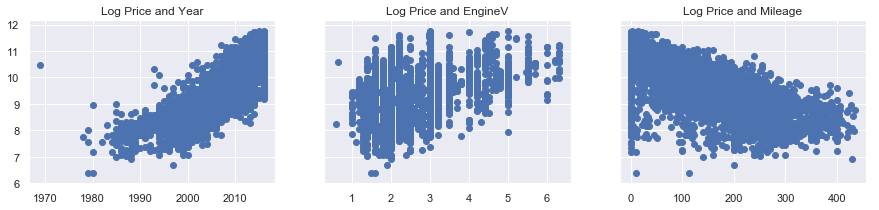

In [89]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_clean['Year'], data_clean['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['Log Price'])
ax3.set_title('Log Price and Mileage')
plt.show()

### Normality and Homoscedasticity

1. Normality is due to big sample size
2. Zero mean is ensured by having an intercept
3. Homoscedasticity holds after applying log transformation

### No Autocorrelation

Since this is not time series or panel data, each obersvation should be independent

### Multicollinearity 

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
variables = data_clean[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values

In [66]:
vif

,VIF,Features
0,3.791073,Mileage
1,10.397185,Year
2,7.671170,EngineV


The larger VIF is, the more collinearity this variable is with other variabels.

Year seems highly correlated with other two variables, so remove it

In [70]:
data_no_coll = data_clean.drop(labels='Year', axis=1)
data_no_coll.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Create Dummy Variables 

If there are N categorical values of a feature, then we need to create N-1 dummy variables for this feature. 

In [71]:
data_with_dummy = pd.get_dummies(data_no_coll, drop_first=True) # drop_first = True means drop first dummy variable (N-1)
data_with_dummy.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange the data 

In [72]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [73]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [74]:
data_preprocessed = data_with_dummy[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression 

### Declare inputs and target 

In [75]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(labels='Log Price', axis=1)

### Feature scaling

Note that while we scale all features, we should NOT apply scaling on dummy variables because they would lose their dummy meaning. 

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
inputs_scaled = scalar.transform(inputs)

### Train-test split 

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

### Create regression 

In [82]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
y_hat = reg.predict(x_train)

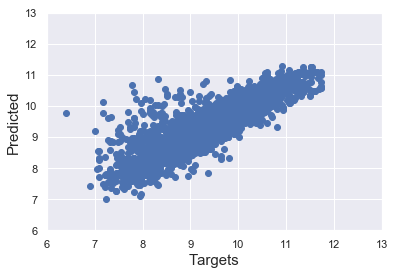

In [87]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets', size=15)
plt.ylabel('Predicted', size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Residuals')

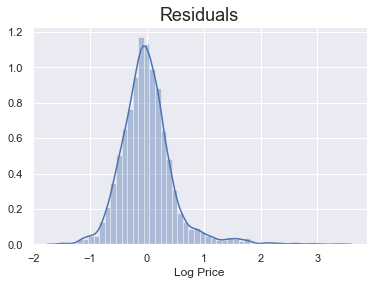

In [90]:
sns.distplot(y_hat - y_train)
plt.title('Residuals', size=18)

$R^2$

In [93]:
reg.score(x_train, y_train)

0.7262985119939247

In [100]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458506
1,EngineV,0.221184
2,Brand_BMW,0.023857
3,Brand_Mercedes-Benz,0.014820
4,Brand_Mitsubishi,-0.125021
5,Brand_Renault,-0.174636
6,Brand_Toyota,-0.050544
7,Brand_Volkswagen,-0.083694
8,Body_hatch,-0.160291
9,Body_other,-0.103882


### Feature selection 

In [121]:
from sklearn.feature_selection import f_regression

In [125]:
p_values = f_regression(x_train, y_train)[1]

In [126]:
reg_summary['P values'] = p_values
reg_summary

,Features,Weights,P values
0,Mileage,-0.458506,1.588772e-305
1,EngineV,0.221184,1.007245e-128
2,Brand_BMW,0.023857,3.621261e-08
3,Brand_Mercedes-Benz,0.014820,3.043078e-10
4,Brand_Mitsubishi,-0.125021,3.394764e-04
5,Brand_Renault,-0.174636,1.214050e-30
6,Brand_Toyota,-0.050544,1.888973e-15
7,Brand_Volkswagen,-0.083694,1.490345e-09
8,Body_hatch,-0.160291,2.866734e-19
9,Body_other,-0.103882,7.014309e-02


## Testing 

In [102]:
y_hat_test = reg.predict(x_test)

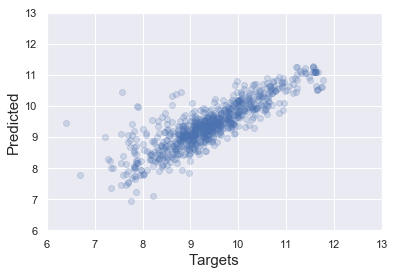

In [104]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets', size=15)
plt.ylabel('Predicted', size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Summary: 

1. In general our regression model has good predictive power, but there are still some outliers. 
2. We can improve our model by using a different set of variables, removing bigger part of outliers, using different transformations or even changing to a different model